In [1]:
import pandas as pd
data=pd.read_excel("lab3_data.xlsx")
df=pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
import pandas as pd
import math

def entropy(column):
    class_counts = column.value_counts()
    total = len(column)
    entropy = 0
    for count in class_counts:
        p=count/total
        entropy=p * math.log2(p)*-1
    return entropy

e1=entropy(df['age'])
print("entropy of age: ",e1)
e2=entropy(df['income'])
print("entropy of income: ",e2)
e3=entropy(df['student'])
print("entropy of student: ",e3)
e4=entropy(df['credit_rating'])
print("entropy of creit_rating: ",e4)

entropy of age:  0.5163871205878868
entropy of income:  0.5163871205878868
entropy of student:  0.5
entropy of creit_rating:  0.5238824662870492


In [3]:
total_entropy = entropy(df['buys_computer'])
print("Total entropy(H): ",total_entropy)

Total entropy(H):  0.5305095811322292


In [14]:
column=['age','income','student','credit_rating']
def ig(col):
    x=entropy(df[col])
    ig=total_entropy-x
    return ig
infog=[]
for i in column:
    a=ig(i)
    infog.append(a)
    print("the information gear of",i,"is",a)
maximum=max(infog)
max_index=infog.index(maximum)
print("the root node will be ",max_index)

the information gear of age is 0.014122460544342408
the information gear of income is 0.014122460544342408
the information gear of student is 0.030509581132229235
the information gear of credit_rating is 0.006627114845180082
the root node will be  2


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

train_score=model.score(X_train, y_train)
print("the training set accuracy for the model is ",train_score)
depth=model.get_depth()
print("the depth of the decision tree: ",depth)

the training set accuracy for the model is  1.0
the depth of the decision tree:  4


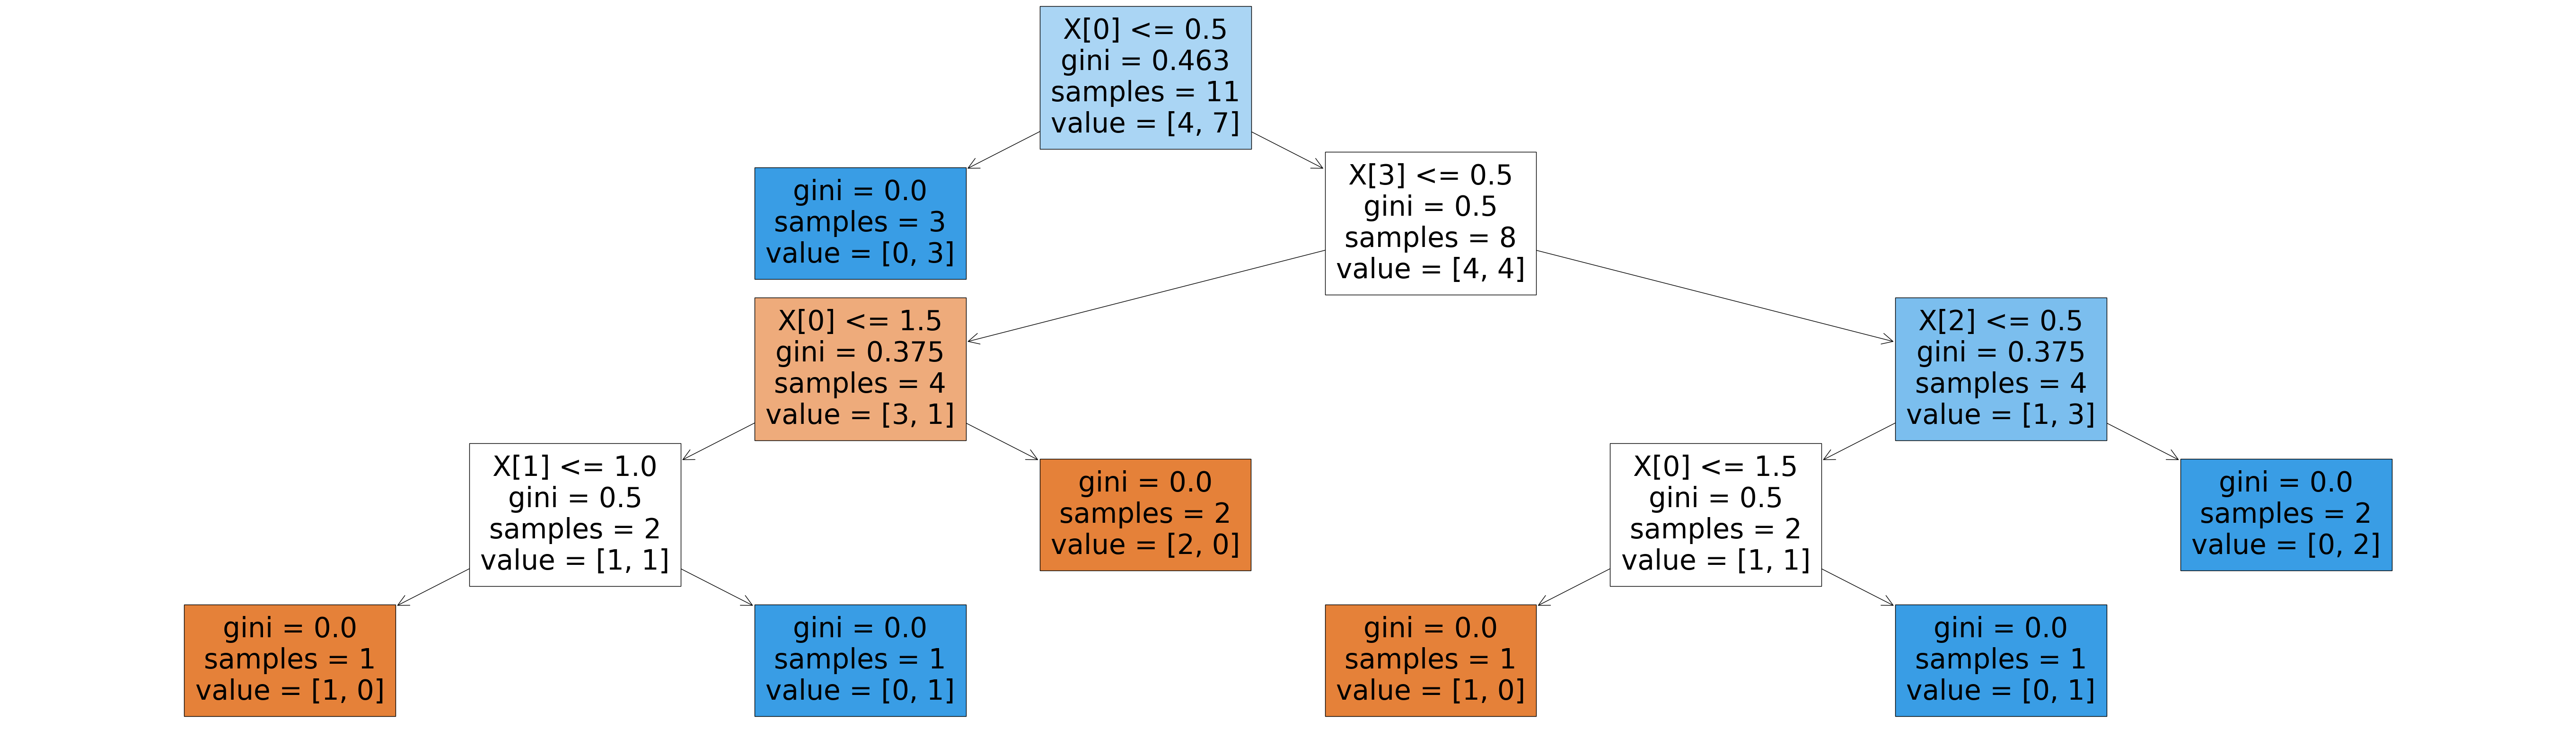

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(70,20))
plot_tree(model,filled=True)
plt.show()